# PART 1A - REAL LIFE EXAMPLES

# 1. Factor de Confusión

**Definición:**  
Un confusor es una variable que afecta tanto a la variable explicativa (X) como a la variable de resultado (Y).  
Si no se controla, genera una relación espuria o sesgada.

**Ejemplo económico:**  
- **X** = Años de educación  
- **Y** = Ingreso mensual  
- **C** = Nivel socioeconómico del hogar  

**Explicación:**  
El nivel socioeconómico afecta la posibilidad de estudiar (X) y también los ingresos futuros (Y).  
Si no controlamos C, sobrestimamos el efecto puro de la educación en el ingreso.

## Definiciones breves


**Confounder (confusor):** afecta a X y a Y; omitirlo sesga el efecto X→Y.


**Collider (colisionador):** efecto común de dos variables; condicionar en él abre un camino espurio.


**Mediation (mediación):** variable intermedia que transmite parte del efecto X→Y; efecto total = directo (X→Y) + indirecto (X→M→Y).


## 1) Confounder

Ejemplo: X = Años de educación; Y = Ingreso mensual; C = Nivel socioeconómico.


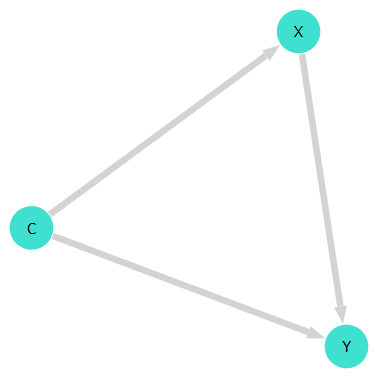

In [8]:
# ====== Part 1a en Julia (Jupyter) ======

using Pkg
for pkg in ["Graphs","GraphPlot","Compose","Cairo","Fontconfig","Markdown"]
    haskey(Pkg.project().dependencies, pkg) || Pkg.add(pkg)
end

using Graphs, GraphPlot, Compose
using Cairo, Fontconfig
using Markdown

# ---- util para guardar PNG ----
savepng(ctx, fname; w=800, h=500) = (display(ctx); draw(PNG(fname, w, h), ctx))

# ---- texto (explicaciones) ----
display(md"## Definiciones breves")
display(md"**Confounder (confusor):** afecta a X y a Y; omitirlo sesga el efecto X→Y.")
display(md"**Collider (colisionador):** efecto común de dos variables; condicionar en él abre un camino espurio.")
display(md"**Mediation (mediación):** variable intermedia que transmite parte del efecto X→Y; efecto total = directo (X→Y) + indirecto (X→M→Y).")

# ---- 1) Confounder ----
display(md"## 1) Confounder  
Ejemplo: X = Años de educación; Y = Ingreso mensual; C = Nivel socioeconómico.")

g1 = DiGraph(3)              # nodos: 1=C, 2=X, 3=Y
add_edge!(g1, 1, 2)          # C -> X
add_edge!(g1, 1, 3)          # C -> Y
add_edge!(g1, 2, 3)          # X -> Y
labels1 = ["C","X","Y"]

ctx1 = gplot(g1; nodelabel=labels1, arrowlengthfrac=0.12, nodesize=0.25)
savepng(ctx1, "confounder.png")


# 2. Colisionador

**Definición:**  
Un colisionador es una variable que es efecto común de dos variables.  
Si condicionamos en ella, abrimos un camino espurio entre X y Y.

**Ejemplo económico:**  
- **X** = Productividad individual  
- **Y** = Acceso a redes sociales de élite  
- **C** = Ser contratado en un banco de inversión  

**Explicación:**  
La contratación (C) depende tanto de la productividad (X) como de las redes (Y).  
Si condicionamos en “haber sido contratado”, podemos inducir una correlación artificial entre productividad y redes, aunque no exista causalidad directa.

## 2) Collider

Ejemplo: X = Productividad; Y = Redes de élite; C = Contratación en banco.


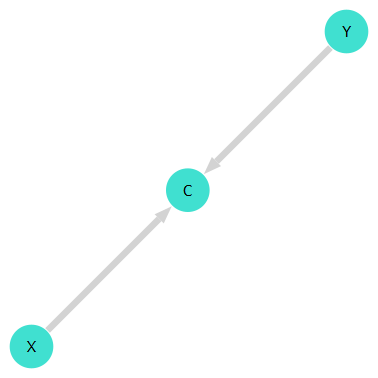

In [13]:
# ---- 2) Collider ----
display(md"## 2) Collider  
Ejemplo: X = Productividad; Y = Redes de élite; C = Contratación en banco.")

g2 = DiGraph(3)              # nodos: 1=X, 2=Y, 3=C
add_edge!(g2, 1, 3)          # X -> C
add_edge!(g2, 2, 3)          # Y -> C
labels2 = ["X","Y","C"]

ctx2 = gplot(g2; nodelabel=labels2, arrowlengthfrac=0.12, nodesize=0.25)
savepng(ctx2, "collider.png")

# 3. Mediación

**Definición:**  
Una variable mediadora transmite parte del efecto de X sobre Y.

**Ejemplo económico:**  
- **X** = Inversión en infraestructura pública  
- **M** = Productividad de las empresas  
- **Y** = Crecimiento económico regional  

**Explicación:**  
La inversión pública (X) incrementa la productividad (M), y esta a su vez genera crecimiento económico (Y).  
El efecto total se compone de un efecto directo (X → Y) y un efecto indirecto vía M.

## 3) Mediation

Ejemplo: X = Inversión pública; M = Productividad empresarial; Y = Crecimiento económico.


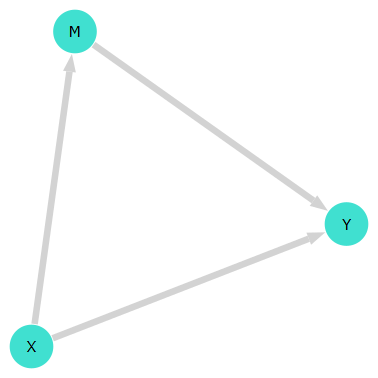

Exportados: confounder.png, collider.png, mediation.png


In [16]:
# ---- 3) Mediation ----
display(md"## 3) Mediation  
Ejemplo: X = Inversión pública; M = Productividad empresarial; Y = Crecimiento económico.")

g3 = DiGraph(3)              # nodos: 1=X, 2=M, 3=Y
add_edge!(g3, 1, 2)          # X -> M
add_edge!(g3, 2, 3)          # M -> Y
add_edge!(g3, 1, 3)          # X -> Y (directo)
labels3 = ["X","M","Y"]

ctx3 = gplot(g3; nodelabel=labels3, arrowlengthfrac=0.12, nodesize=0.25)
savepng(ctx3, "mediation.png")

println("Exportados: confounder.png, collider.png, mediation.png")

# PART 1B - SIMPSON'S PARADOX

Pendientes e interceptos:
Grupo A: b=0.646, a=19.989
Grupo B: b=0.722, a=-29.364
Pooled : b=-5.733 (esperado negativo), a=27.976


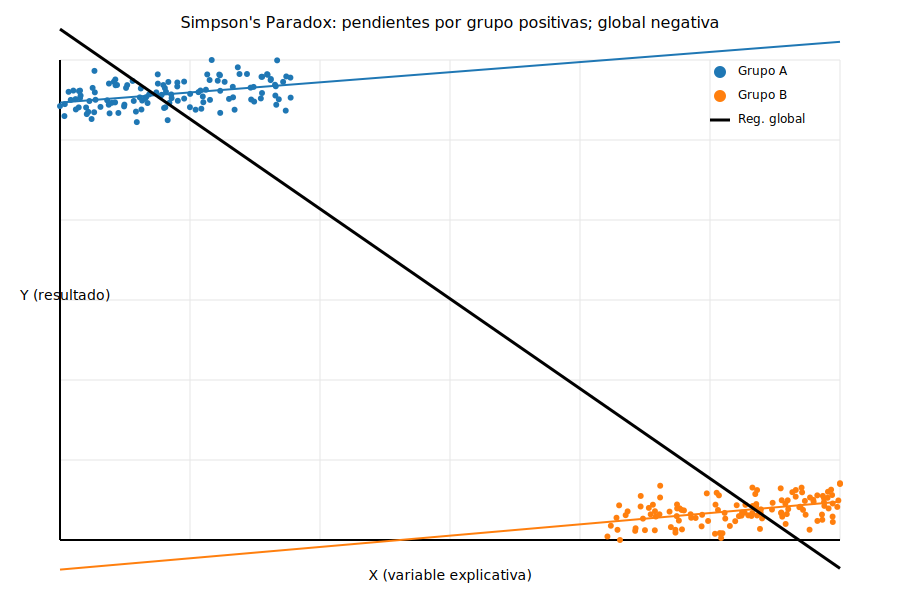

Archivo guardado en: simpsons_paradox.svg


In [53]:
# Simpson's Paradox — gráfico SVG manual (sin Plots/Makie/Compose)
using Random, DataFrames, StatsModels, GLM

function simpson_svg(; seed=123, outfile="simpsons_paradox.svg", W=900, H=600)
    Random.seed!(seed)

    # --- datos y OLS ---
    nA=nB=120
    xA = rand(nA).*3 .+ 0
    xB = rand(nB).*3 .+ 7
    yA = 0.60 .* xA .+ 20 .+ randn(nA).*1.2
    yB = 0.80 .* xB .- 30 .+ randn(nB).*1.2
    dfA = DataFrame(X=xA,Y=yA); dfB = DataFrame(X=xB,Y=yB); df=vcat(dfA,dfB)
    βA = coef(lm(@formula(Y~X), dfA))
    βB = coef(lm(@formula(Y~X), dfB))
    βP = coef(lm(@formula(Y~X), df))

    println("Pendientes e interceptos:")
    println("Grupo A: b=$(round(βA[2],digits=3)), a=$(round(βA[1],digits=3))")
    println("Grupo B: b=$(round(βB[2],digits=3)), a=$(round(βB[1],digits=3))")
    println("Pooled : b=$(round(βP[2],digits=3)) (esperado negativo), a=$(round(βP[1],digits=3))")

    # --- escalas a pixeles ---
    m = 60                         # margen
    xmin, xmax = minimum(df.X), maximum(df.X)
    ymin, ymax = minimum(df.Y), maximum(df.Y)
    sx(x) = m + (x - xmin) / (xmax - xmin) * (W - 2m)
    sy(y) = H - m - (y - ymin) / (ymax - ymin) * (H - 2m)  # invertido

    # malla
    xticks = range(xmin, xmax, length=7) |> collect
    yticks = range(ymin, ymax, length=7) |> collect

    # líneas estimadas
    xgrid = collect(range(xmin, xmax; length=200))
    yAhat = βA[1] .+ βA[2] .* xgrid
    yBhat = βB[1] .+ βB[2] .* xgrid
    yPhat = βP[1] .+ βP[2] .* xgrid

    # --- construir SVG como string ---
    buf = IOBuffer()
    write(buf, """<svg xmlns="http://www.w3.org/2000/svg" width="$W" height="$H" viewBox="0 0 $W $H">""")

    # fondo
    write(buf, """<rect x="0" y="0" width="$W" height="$H" fill="white"/>""")

    # grid
    for x in xticks
        write(buf, """<line x1="$(sx(x))" y1="$(m)" x2="$(sx(x))" y2="$(H-m)" stroke="#e5e5e5" stroke-width="1"/>""")
    end
    for y in yticks
        write(buf, """<line x1="$(m)" y1="$(sy(y))" x2="$(W-m)" y2="$(sy(y))" stroke="#e5e5e5" stroke-width="1"/>""")
    end

    # ejes
    write(buf, """<line x1="$m" y1="$(H-m)" x2="$(W-m)" y2="$(H-m)" stroke="black" stroke-width="2"/>""")
    write(buf, """<line x1="$m" y1="$m" x2="$m" y2="$(H-m)" stroke="black" stroke-width="2"/>""")

    # etiquetas básicas
    write(buf, """<text x="$(W/2)" y="$(H-20)" font-size="14" text-anchor="middle">X (variable explicativa)</text>""")
    write(buf, """<text x="20" y="$(H/2)" font-size="14" text-anchor="start">Y (resultado)</text>""")
    write(buf, """<text x="$(W/2)" y="28" font-size="16" text-anchor="middle">Simpson's Paradox: pendientes por grupo positivas; global negativa</text>""")

    # puntos
    for (x,y) in zip(dfA.X, dfA.Y)
        write(buf, """<circle cx="$(sx(x))" cy="$(sy(y))" r="3" fill="#1f77b4"/>""")
    end
    for (x,y) in zip(dfB.X, dfB.Y)
        write(buf, """<circle cx="$(sx(x))" cy="$(sy(y))" r="3" fill="#ff7f0e"/>""")
    end

    # función para polilínea
    function polyline(xs, ys, color, w)
        pts = join(["$(sx(xs[i])),$(sy(ys[i]))" for i in eachindex(xs)], " ")
        return """<polyline fill="none" stroke="$color" stroke-width="$w" points="$pts"/>"""
    end
    write(buf, polyline(xgrid, yAhat, "#1f77b4", 2))
    write(buf, polyline(xgrid, yBhat, "#ff7f0e", 2))
    write(buf, polyline(xgrid, yPhat, "#000000", 3))

    # leyenda simple
    write(buf, """<circle cx="$(0.80W)" cy="$(0.12H)" r="6" fill="#1f77b4"/><text x="$(0.82W)" y="$(0.125H)" font-size="12">Grupo A</text>""")
    write(buf, """<circle cx="$(0.80W)" cy="$(0.16H)" r="6" fill="#ff7f0e"/><text x="$(0.82W)" y="$(0.165H)" font-size="12">Grupo B</text>""")
    write(buf, """<line x1="$(0.80W-10)" y1="$(0.20H)" x2="$(0.80W+10)" y2="$(0.20H)" stroke="black" stroke-width="3"/><text x="$(0.82W)" y="$(0.205H)" font-size="12">Reg. global</text>""")

    write(buf, "</svg>")
    svg = String(take!(buf))
    open(outfile, "w") do f; write(f, svg) end
    return (outfile, svg, dfA, dfB, df, βA, βB, βP)
end

out, svg, dfA, dfB, df, βA, βB, βP = simpson_svg()
# mostrar inline
display("image/svg+xml", svg)
println("Archivo guardado en: ", out)
